<a href="https://colab.research.google.com/github/kiristoky/UGR16_RNN/blob/main/UGR%2016%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # This allows you to upload the file interactively


Saving test.csv to test.csv


In [ ]:
from google.colab import files
uploaded = files.upload()  # This allows you to upload the file interactively


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# 1. Load Dataset
# Ganti path dengan file training dan testing dataset
train_data_path = "train.csv"
test_data_path = "test.csv"

# Load data using the correct separator (e.g., comma)
train_data = pd.read_csv(train_data_path, sep=',', header=None) # Changed sep to ','
test_data = pd.read_csv(test_data_path, sep=',', header=None)  # Changed sep to ','

# Memberikan nama kolom (13 kolom)
columns = ["Time", "Duration", "SourceIP", "DestinationIP", "SourcePort", "DestinationPort",
           "Protocol", "Flags", "Packets", "Bytes", "Extra", "Class", "Background"]
train_data.columns = columns
test_data.columns = columns

# 2. Feature Selection
# Pilih hanya fitur numerik untuk model (durasi, paket, byte)
train_features = train_data[["Duration", "Packets", "Bytes"]]
test_features = test_data[["Duration", "Packets", "Bytes"]]

# Normalisasi fitur
scaler = MinMaxScaler()
train_features_normalized = scaler.fit_transform(train_features)
test_features_normalized = scaler.transform(test_features)

# Buat sequence untuk RNN
sequence_length = 10

def create_sequences(features, sequence_length):
    X = []
    for i in range(len(features) - sequence_length):
        X.append(features[i:i+sequence_length])
    return np.array(X)

X_train = create_sequences(train_features_normalized, sequence_length)
X_test = create_sequences(test_features_normalized, sequence_length)

# 3. Build RNN Model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(sequence_length, X_train.shape[2])),
    tf.keras.layers.SimpleRNN(64, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[2])
])

# 4. Compile the Model before training
# Add this line to compile your model with an optimizer, loss function, and metrics.
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Example using Adam optimizer, MSE loss, and MAE metric

# 4. Train the Model
history = model.fit(X_train, X_train[:, -1, :], epochs=10, batch_size=32, validation_split=0.2)


In [ ]:
# 5. Evaluate on Test Data
loss = model.evaluate(X_test, X_test[:, -1, :]) # Using the last timestep's features as targets
print(f"Test Loss: {loss}")

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 102s 3ms/step - loss: 1.0527e-07 - mae: 6.0972e-05
Test Loss: [1.3055344538770441e-07, 6.78965516272001e-05]


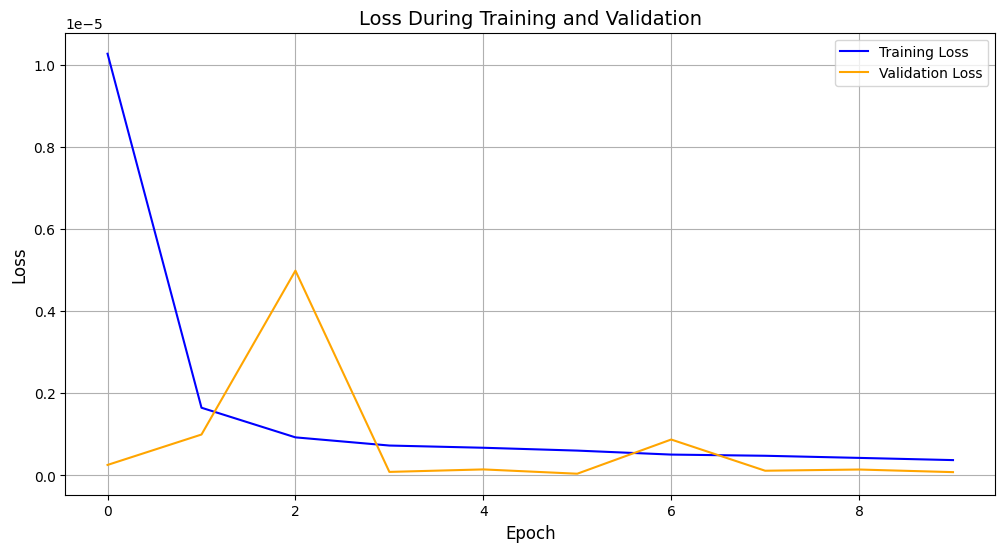

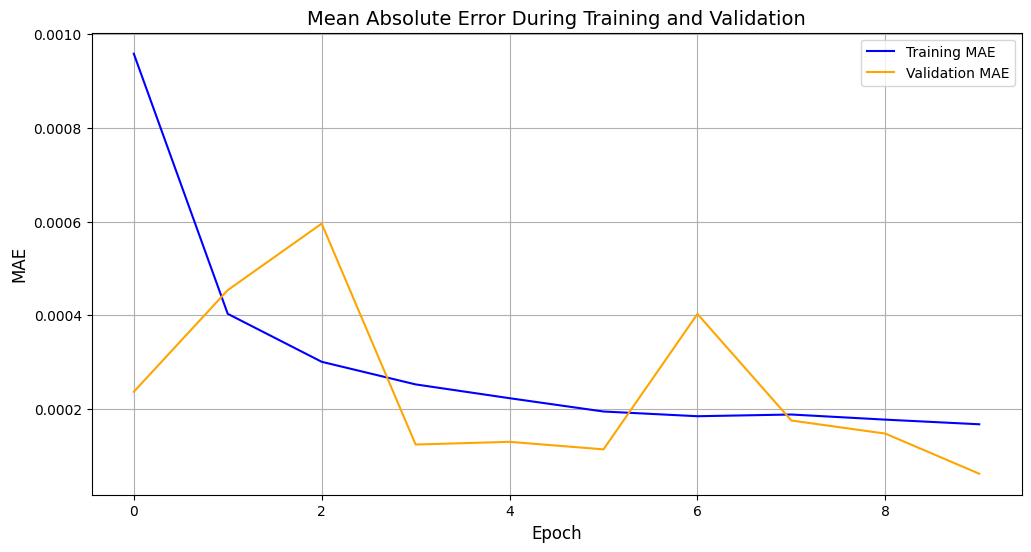

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss During Training and Validation', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot MAE (Train dan Validation)
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='orange')
plt.title('Mean Absolute Error During Training and Validation', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Perbandingan dengan data asli

32768/32768 ━━━━━━━━━━━━━━━━━━━━ 103s 3ms/step
    Actual Duration  Predicted Duration  Actual Packets  Predicted Packets  \
0             0.000            0.018212             0.0           0.000002   
1             0.000            0.046285             0.0           0.000003   
2             0.000            0.030077             0.0           0.000002   
3            48.528           48.314293             0.0          -0.000009   
4            48.532           48.104183             0.0          -0.000009   
5            51.040           50.557076             0.0          -0.000009   
6            51.040           50.574879             0.0          -0.000009   
7            55.504           55.022305             0.0          -0.000007   
8            55.504           55.004494             0.0          -0.000007   
9             0.000           -0.114168             0.0           0.000003   
10            0.000            0.034246             0.0           0.000002   
11            0.0

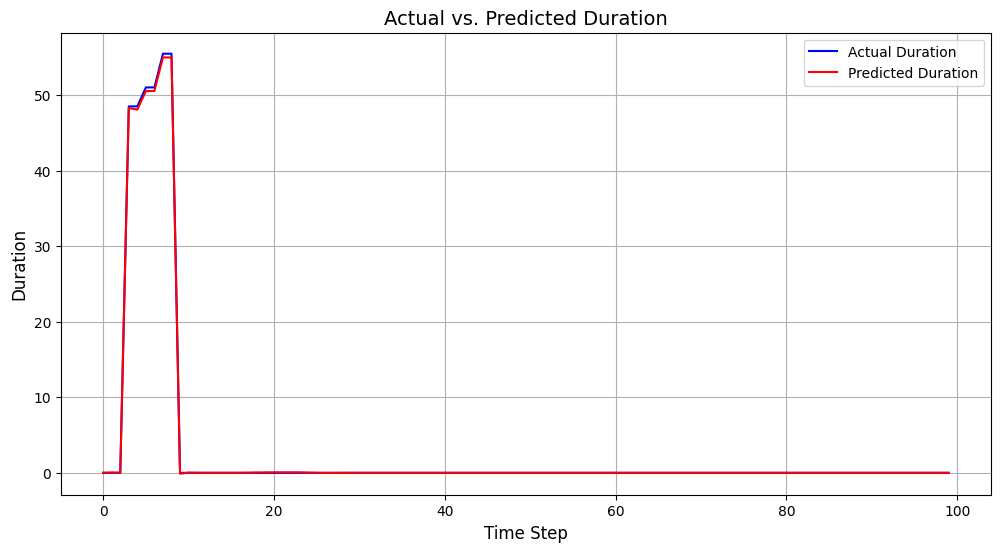

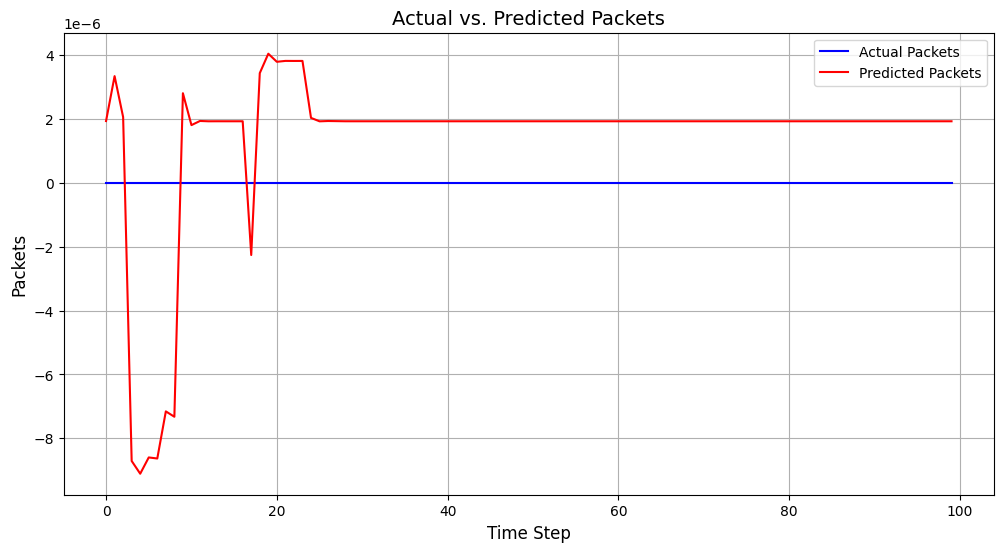

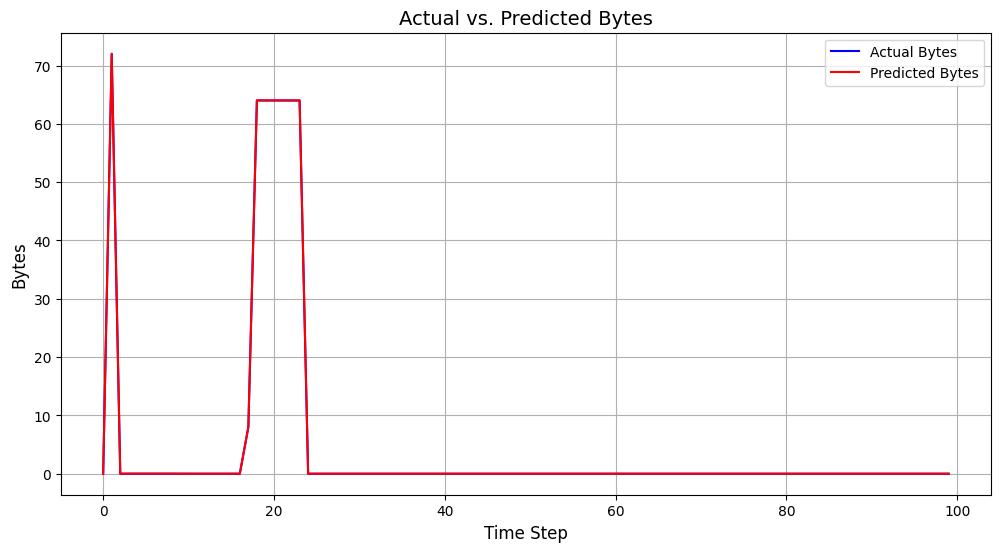

In [ ]:
# prompt: buat perbandingan dari data asli dan data preict


# Predict on test data
predictions = model.predict(X_test)

# Inverse transform to get actual values
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(X_test[:, -1, :]) # Inverse transform actual values

# Create DataFrames for easier comparison
comparison_df = pd.DataFrame({
    'Actual Duration': actual_values[:, 0],
    'Predicted Duration': predictions[:, 0],
    'Actual Packets': actual_values[:, 1],
    'Predicted Packets': predictions[:, 1],
    'Actual Bytes': actual_values[:, 2],
    'Predicted Bytes': predictions[:, 2],
})

print(comparison_df.head(20))  # Print the first 20 rows for comparison


# Plotting Comparisons (Example for Duration)
plt.figure(figsize=(12, 6))
plt.plot(actual_values[:100, 0], label='Actual Duration', color='blue')  # Plot the first 100 values
plt.plot(predictions[:100, 0], label='Predicted Duration', color='red')
plt.title('Actual vs. Predicted Duration', fontsize=14)
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Plot Comparison for Packets
plt.figure(figsize=(12, 6))
plt.plot(actual_values[:100, 1], label='Actual Packets', color='blue')
plt.plot(predictions[:100, 1], label='Predicted Packets', color='red')
plt.title('Actual vs. Predicted Packets', fontsize=14)
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Packets', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot Comparison for Bytes
plt.figure(figsize=(12, 6))
plt.plot(actual_values[:100, 2], label='Actual Bytes', color='blue')
plt.plot(predictions[:100, 2], label='Predicted Bytes', color='red')
plt.title('Actual vs. Predicted Bytes', fontsize=14)
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Bytes', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Deteksi anomali

Anomali ditemukan pada indeks berikut: [      3       4       5 ... 1047689 1048233 1048234]


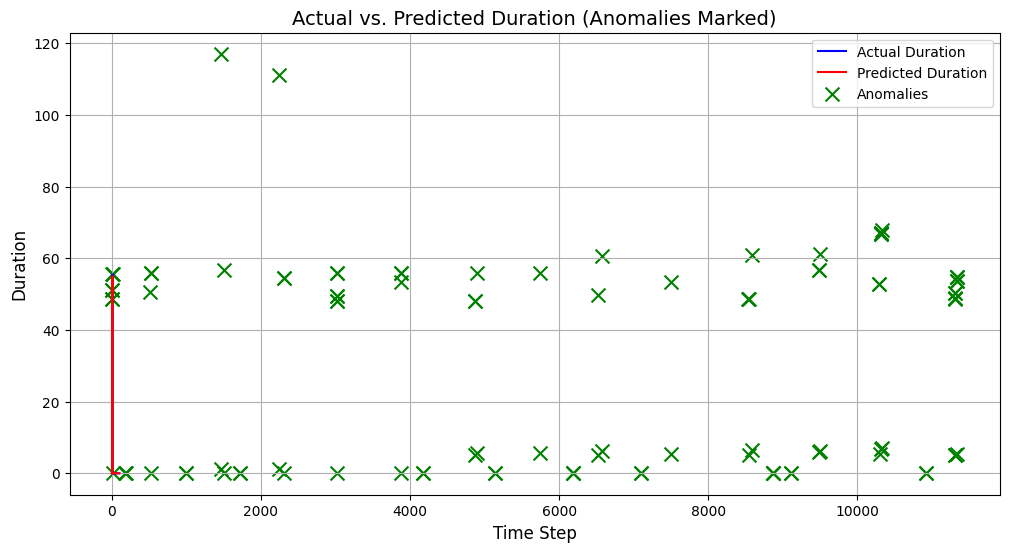

Anomali pada Packets ditemukan pada indeks berikut: []
Anomali pada Bytes ditemukan pada indeks berikut: [    520    1498    3021 ... 1045719 1045772 1047582]


In [ ]:

threshold = 0.1  # Atur threshold untuk mendeteksi anomali

# Hitung selisih absolut antara prediksi dan nilai aktual
absolute_errors = np.abs(predictions - actual_values)

# Identifikasi anomali berdasarkan threshold
anomalies = absolute_errors > threshold

# Tampilkan hasil deteksi anomali
anomaly_indices = np.where(anomalies)[0]
print(f"Anomali ditemukan pada indeks berikut: {anomaly_indices}")

# Plot data asli dengan anomali yang ditandai
plt.figure(figsize=(12, 6))
plt.plot(actual_values[:100, 0], label='Actual Duration', color='blue')
plt.plot(predictions[:100, 0], label='Predicted Duration', color='red')
plt.scatter(anomaly_indices[:100], actual_values[anomaly_indices[:100], 0], color='green', label='Anomalies', marker='x', s=100)
plt.title('Actual vs. Predicted Duration (Anomalies Marked)', fontsize=14)
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Anda juga bisa mendeteksi anomali pada fitur lain (Packets dan Bytes) dengan cara yang sama.

# Contoh deteksi anomali pada Packets:
anomalies_packets = np.abs(predictions[:, 1] - actual_values[:, 1]) > threshold
anomaly_indices_packets = np.where(anomalies_packets)[0]
print(f"Anomali pada Packets ditemukan pada indeks berikut: {anomaly_indices_packets}")


# Contoh deteksi anomali pada Bytes:
anomalies_bytes = np.abs(predictions[:, 2] - actual_values[:, 2]) > threshold
anomaly_indices_bytes = np.where(anomalies_bytes)[0]
print(f"Anomali pada Bytes ditemukan pada indeks berikut: {anomaly_indices_bytes}")